In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-05-22 16:49:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.48, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  22.9MB/s    in 0.5s    

2021-05-22 16:49:42 (22.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse34-8.png', 'horse19-4.png', 'horse06-7.png', 'horse13-8.png', 'horse07-4.png', 'horse10-9.png', 'horse28-3.png', 'horse04-3.png', 'horse35-4.png', 'horse29-0.png']
['human17-10.png', 'human16-25.png', 'human10-10.png', 'human06-28.png', 'human05-04.png', 'human11-13.png', 'human06-10.png', 'human13-17.png', 'human14-07.png', 'human07-25.png']


In [5]:
validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse5-032.png', 'horse2-011.png', 'horse6-064.png', 'horse1-539.png', 'horse4-345.png', 'horse6-089.png', 'horse4-232.png', 'horse5-478.png', 'horse3-584.png', 'horse5-203.png']
['valhuman01-12.png', 'valhuman02-00.png', 'valhuman03-15.png', 'valhuman04-07.png', 'valhuman04-02.png', 'valhuman04-21.png', 'valhuman01-19.png', 'valhuman04-10.png', 'valhuman03-04.png', 'valhuman02-01.png']


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                      for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                      for fname in train_human_names[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

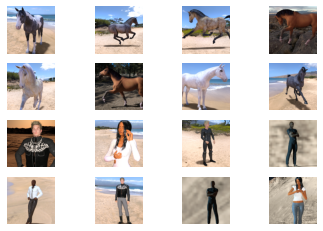

In [8]:
for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
# Building the model
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr=0.001),
    metrics = ['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size = (300, 300),
        batch_size = 128,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size = (300, 300),
        batch_size = 32,
        class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,  
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 21s 2s/step - loss: 0.7884 - accuracy: 0.5136 - val_loss: 0.6752 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 19s 2s/step - loss: 0.7178 - accuracy: 0.5323 - val_loss: 0.6537 - val_accuracy: 0.5039
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.6444 - accuracy: 0.5757 - val_loss: 0.4932 - val_accuracy: 0.7891
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.4697 - accuracy: 0.8233 - val_loss: 0.5340 - val_accuracy: 0.8711
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.3485 - accuracy: 0.8477 - val_loss: 1.6339 - val_accuracy: 0.8086
Epoch 6/15
8/8 [==============================] - 20s 2s/step - loss: 0.2037 - accuracy: 0.9282 - val_loss: 0.5304 - val_accuracy: 0.8867
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.8892 - accuracy: 0.7521 - val_loss: 1.7974 - val_accuracy: 0.7031
Epoch 8/15
8/8 [==================

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

<ipython-input-21-e4a1aa5dc464>:26: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


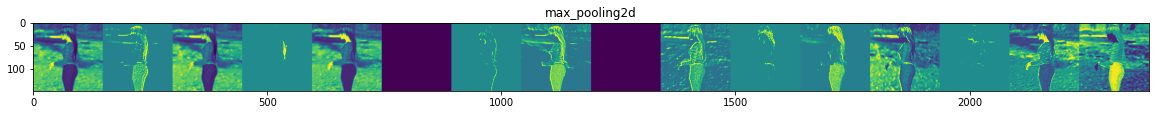

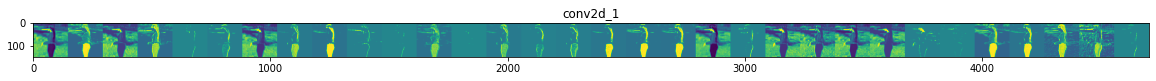

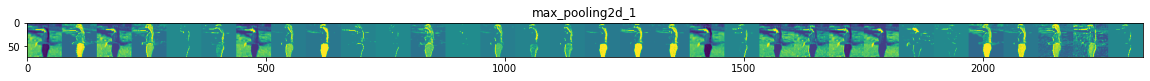

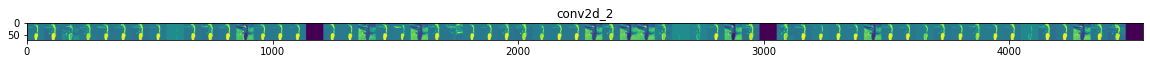

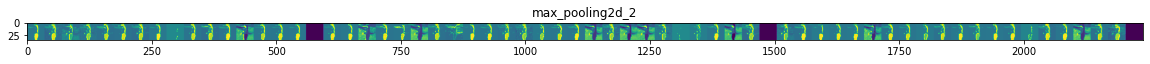

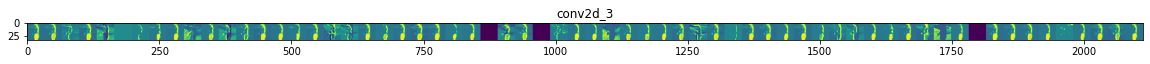

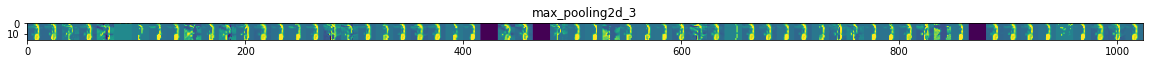

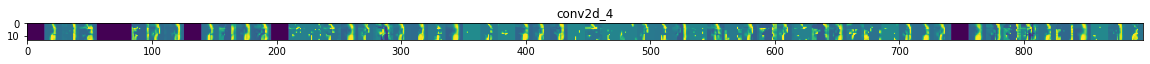

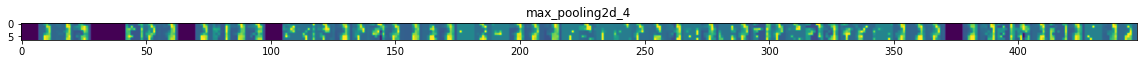

In [21]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
              
            display_grid[:, i * size : (i + 1) * size] = x
            
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)